In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
import seaborn as sns

data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']]


data

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [62]:
data['age'].fillna(data['age'].mean(), inplace=True)
data['embarked'].fillna(data['embarked'].mode(), inplace=True)

label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['embarked'] = label_encoder.fit_transform(data['embarked'])

X = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']]
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

modle = LogisticRegression()
modle.fit(X_train, y_train)

y_pred = modle.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)
print(classification_report(y_test, y_pred))

accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



/tmp/ipykernel_42100/630040626.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
/tmp/ipykernel_42100/630040626.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [92]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
        self.prev = None
        

class LinkedList:
    def __init__(self):
        self.head = None


    def insert_at_beggining(self, data): 
        new_node = Node(data)
        if self.head is not None:
            self.head.prev = new_node
        new_node.next = self.head
        self.head = new_node

    def insert_at_end(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        last_node = self.head
        while last_node.next:
            last_node = last_node.next
        last_node.next = new_node
        new_node.prev = last_node

    def print_odd(self): 
        curr = self.head
        while curr:
            if curr.data %2 != 0:
                print(curr.data, end='-->')
            curr = curr.next
        print('None')

    def print_ll(self): 
        curr = self.head
        while curr:
            print(curr.data, end='-->')
            curr = curr.next
        print('None')
ll = LinkedList()
ll.insert_at_beggining(5)
ll.insert_at_beggining(3)
ll.insert_at_beggining(8)
ll.insert_at_beggining(4)
ll.insert_at_end(10)
ll.print_odd()
ll.print_ll()

3-->5-->None
4-->8-->3-->5-->10-->None


In [5]:
# static var

class Student:
    school_name = 'pyhton school'

    def __init__(self, name):
        self.name = name

student1 = Student('Aromal')
stundent2 = Student('Dileep')

print(student1.school_name)
print(Student.school_name)

pyhton school
pyhton school


In [30]:
# Supre init 
class Animal:
    def __init__(self, name):
        self.name = name
        print(self.name)

class Dog(Animal):
    def __init__(self, name, breed):
        # Call parent class's __init__
        super().__init__(name)
        self.breed = breed

# Creates a Dog object with both name and breed
dog = Dog("Max", "Golden Retriever")

Max


<Axes: >

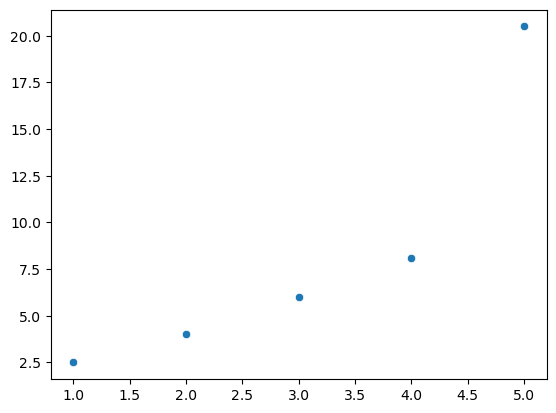

In [97]:
import numpy as np
class MyLinearR:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis=1 )
        beta = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.coef_ = beta[1:]
        self.intercept_ = beta[0]

    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

lr = MyLinearR()
X_train = [[1], [2], [3], [4]]
y_train = [2.5, 4.5, 6.5, 8.5]
lr.fit(X_train, y_train)
X_test = [[5], [6], [7], [8]]
lr.predict(X_test)


        
        

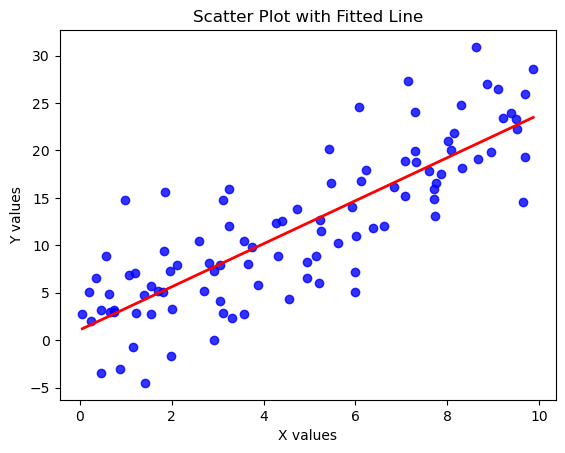

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(42)
x = np.random.rand(100) * 10  # Random x values
y = 2.5 * x + np.random.randn(100) * 5  # Linear relationship with noise

# Create a DataFrame for easier plotting with seaborn
data = pd.DataFrame({'x': x, 'y': y})

# Plot the scatter plot with a fitted regression line
sns.regplot(x='x', y='y', data=data, ci=None, color='blue', line_kws={"color": "red", "linewidth": 2})

# Customize the plot
plt.title('Scatter Plot with Fitted Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()
